In [ ]:
num_classes = 10  # 0~9 10개 값
# input image dimensions
img_rows, img_cols = 28, 28

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0]

In [ ]:
y_train[0]

5

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train.shape[0]

60000

input data에 존재하는 이미지의 shape 변경 <br> (28x28) => (28x28x1)<br>

In [ ]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
x_train[0]

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')/255 # 0 ~ 1 사이의 값으로 normalization
x_test = x_test.astype('float32')/255

In [ ]:
y_train[0]

5

0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0

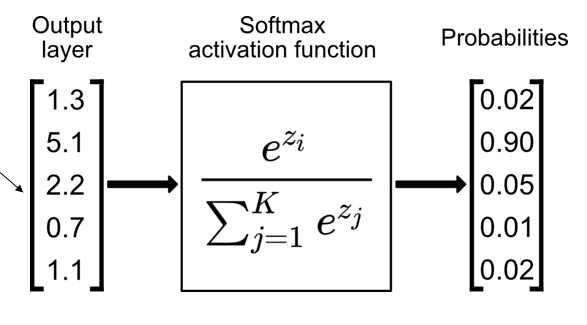

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
# 각 클래스별 확률을 명확히 대응시켜 학습의 효과를 높이기 위해서.... 변환

In [ ]:
print(y_train[0])
y_train_one_hot[0]

5


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
# 2D 필터의 움직임이 2D(가로 세로, 옆으로 아래로... ) ... 1D(한방향..)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
                 # padding = 'vaild' # default 값.. 사용안함, 'same' : 패딩 사용
                 # (N-F)/S + 1
# strides=(1, 1)
# activation map size = 26 * 26
# img_rows, img_cols = 28, 28
# model.add(Conv2D(32
# (28-3)/1 +1 => 26  Depth = 필터수... 32    (최종적으로 산출되는 AM)
# 각각의 필터가 가지는 P 수 =? 3*3 = 9 + 1(bias) = 10 ............. 총P = 10 * 32 = 320

Conv2D :  https://keras.io/layers/convolutional/  
          https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
<br> 참고

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# strides의 기본값 => pool_size ..... 2

2x2 크기의 filter를 사용해서 Max pooling 수행

In [ ]:
model.add(Flatten())

Flatten(): 3차원 형태의 데이터를 1차원 형태로 변경
<br>
FC층의 입력 데이터 포맷에 맞춤

In [ ]:
model.add(Dense(128, activation='relu'))

In [ ]:
model.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model.summary()  # Conv2D 레이어 2 개

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
# Early Stopping 콜백 설정
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',     # 검증 손실을 기준으로
    min_delta=0.01,        # 0.001보다 작은 변화는 무시 0.01
    patience=5,             # 5 에포크 동안 개선 없으면 중지
    verbose=1,              # 진행 상황 출력
    mode='auto'             # 자동으로 최소/최대를 결정
)


In [ ]:
history = model.fit(x_train, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2,  callbacks=[early_stopping])  # 콜백 추가

Epoch 1/10
375/375 [==============================] - 26s 69ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0574 - val_accuracy: 0.9870
Epoch 2/10
375/375 [==============================] - 25s 67ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0613 - val_accuracy: 0.9865
Epoch 3/10
375/375 [==============================] - 26s 68ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0662 - val_accuracy: 0.9861
Epoch 4/10
375/375 [==============================] - 24s 65ms/step - loss: 9.2805e-04 - accuracy: 0.9998 - val_loss: 0.0665 - val_accuracy: 0.9863
Epoch 5/10
375/375 [==============================] - 25s 67ms/step - loss: 7.4956e-04 - accuracy: 0.9998 - val_loss: 0.0660 - val_accuracy: 0.9881
Epoch 6/10
375/375 [==============================] - 25s 67ms/step - loss: 6.2168e-04 - accuracy: 0.9999 - val_loss: 0.0646 - val_accuracy: 0.9888
Epoch 6: early stopping


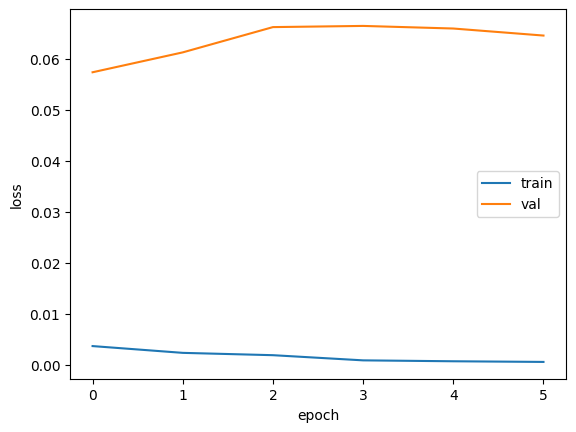

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

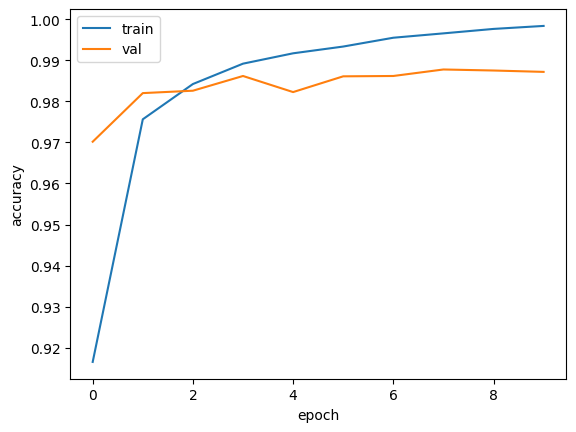

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_one_hot)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0436 - accuracy: 0.9865
test_acc: 0.9865000247955322


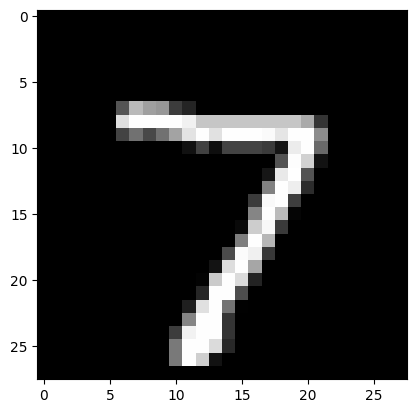

In [ ]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [ ]:
import numpy as np
np.set_printoptions(suppress=True, precision=10)
prediction = model.predict(x_test[0:1]) # 첫번째 이미지 in the test dataset

1/1 [==============================] - 0s 99ms/step


In [ ]:
prediction

array([[0.0000000005, 0.0000000007, 0.0000000208, 0.0000019434,
        0.          , 0.          , 0.          , 0.9999981   ,
        0.0000000061, 0.0000000502]], dtype=float32)

In [ ]:
y_test[0]

7

In [ ]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
print(labels[np.argmax(prediction)])

7


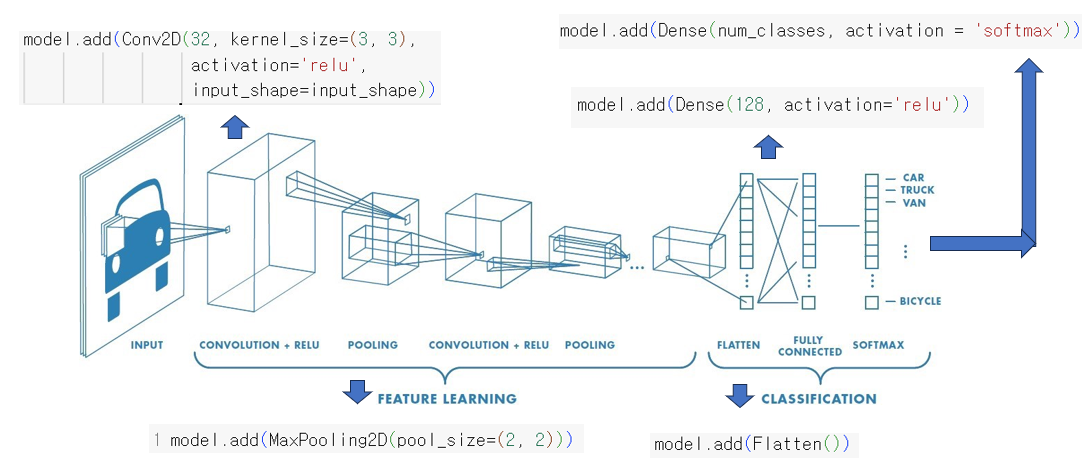